In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image
from IPython.display import display
import seaborn as sns
from pylab import rcParams
from matplotlib.colors import ListedColormap

# визуализация корреляционной матрицы для исследования зависимостей между признаками
def show_correlation(data):
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot = True, fmt = ".2f")
    plt.show()

In [46]:
!git clone https://github.com/sirius-devel/fedorova_ai_architect_course.git

Cloning into 'fedorova_ai_architect_course'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 24 (delta 4), reused 20 (delta 3), pack-reused 0
Receiving objects: 100% (24/24), 490.28 KiB | 1004.00 KiB/s, done.
Resolving deltas: 100% (4/4), done.


In [48]:
def knn(neighbors, X, y):
    # Определение тренировочного и тестового подмножеств
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])
    X = np.array(X)
    y = np.array(y)
    rcParams['figure.figsize'] = 5, 5
    # Обучение модели KNeighborsClassifier
    model = KNeighborsClassifier(neighbors, weights='uniform')
    model.fit(X_train, y_train)
    # Цвет задается
    # каждой точке в матрице [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    # Рисуем точки из тренировочного подмножества, ось x - это 'Glucose', ось y - это "BMI"
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold, edgecolor = 'k', s = 25)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Классификация Outcome (k = %i, weights = '%s')" % (neighbors, 'uniform'))
    plt.show()
    # Оцениваем и печатаем результаты классификации
    y_expected = y_test
    y_predicted = model.predict(X_test)
    print('----------------------------------------------------------------------')
    print('Результаты классификации')
    print('----------------------------------------------------------------------')
    print('\n', classification_report(y_expected, y_predicted))
    print('----------------------------------------------------------------------')
    # Тестируем модель на тестовых данных и оцениваем точность
    test_accuracy = model.score(X_test, y_test)
    print('Точность на тестовых данных =', test_accuracy*100, " %")
    print('----------------------------------------------------------------------')

# Чтение данных из файла
df = pd.read_csv('/content/fedorova_ai_architect_course/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


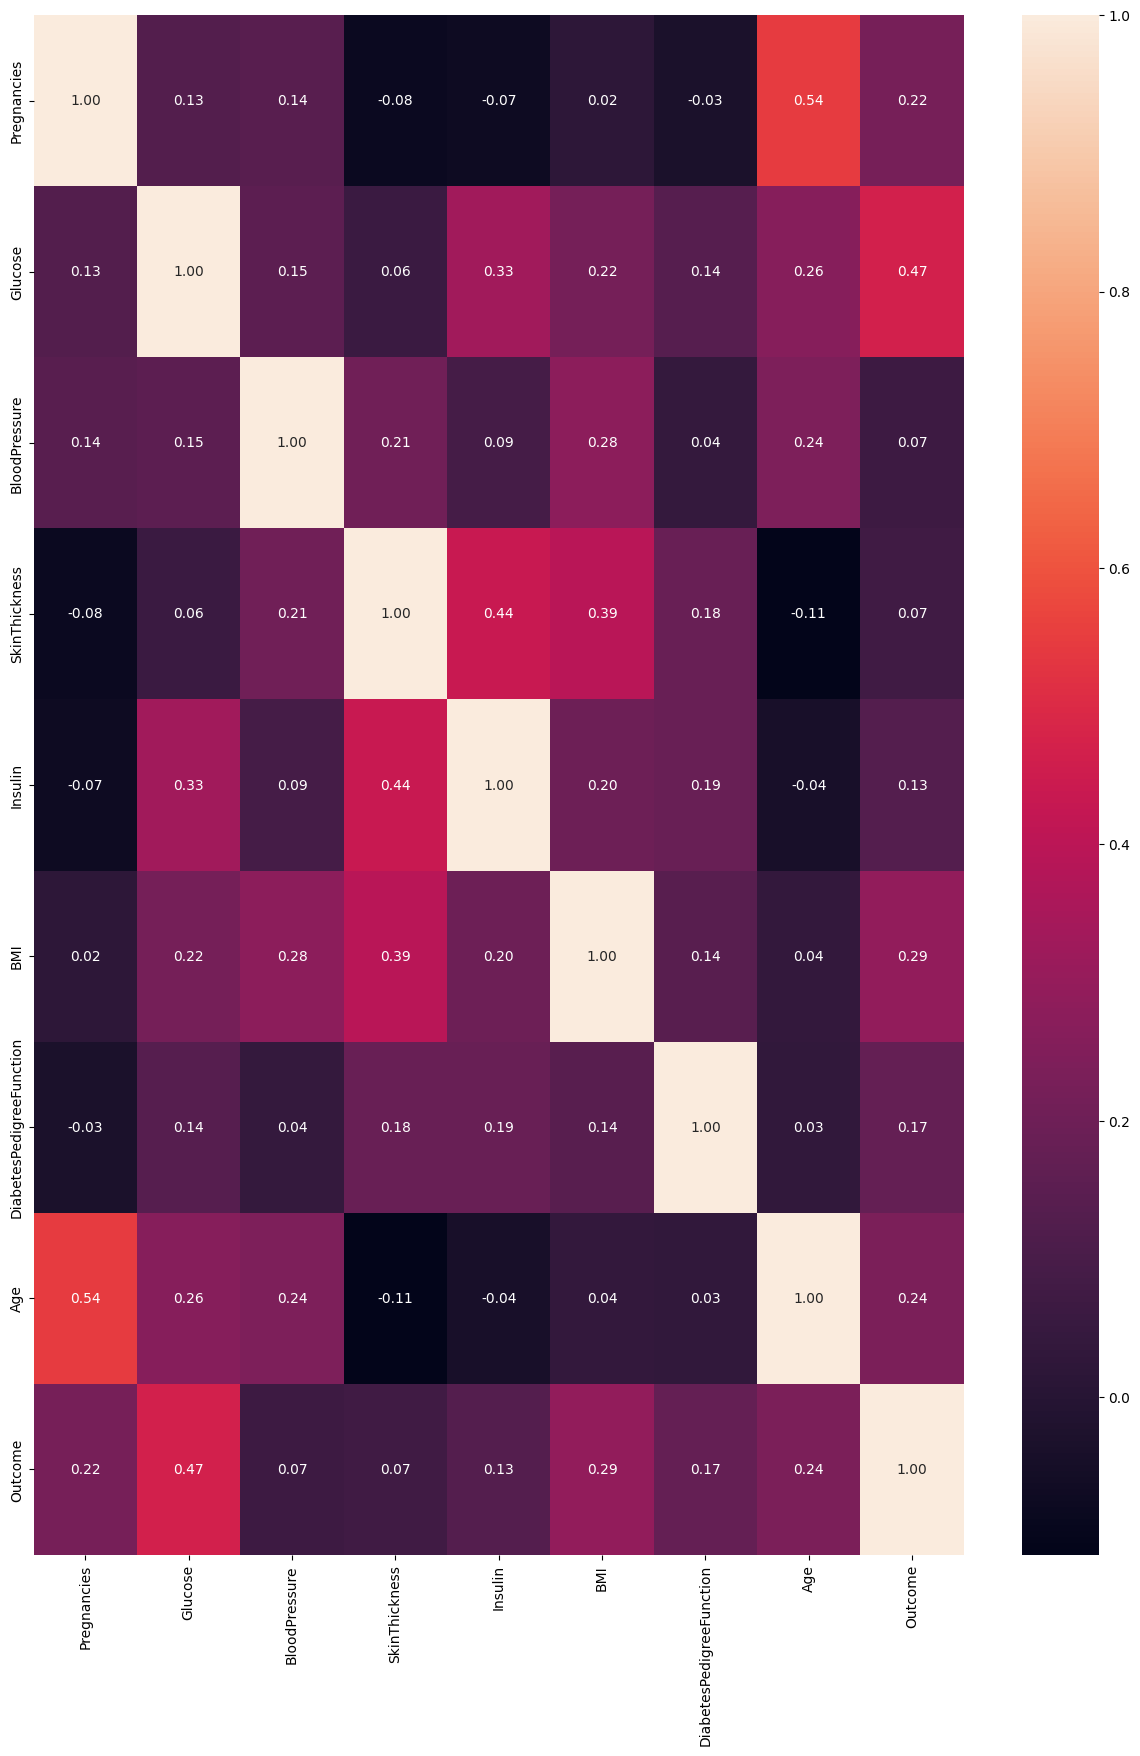

In [49]:
show_correlation(df)

In [50]:
# По последней строке в матрице корреляции видно, что для целевой переменной важна зависимость от Glucose (0.47) и BMI (0.29).
# В то же время между Glucose и BMI есть небольшая положительная корреляция с коэффициентом 0.22 < 0.5. Это означает, что данные переменные можно
# рассматривать как независимые друг от друга и использовать их для классификации по целевой переменной и визуализации результатов

In [59]:
X = np.array(df.iloc[:, [1,5]])
y = np.array(df.iloc[:, 8])

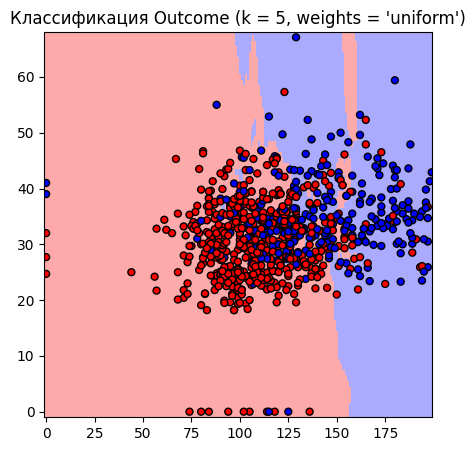

----------------------------------------------------------------------
Результаты классификации
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.77      0.80      0.78       123
           1       0.62      0.58      0.60        69

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192

----------------------------------------------------------------------
Точность на тестовых данных = 71.875  %
----------------------------------------------------------------------


In [60]:
knn(5, X, y)

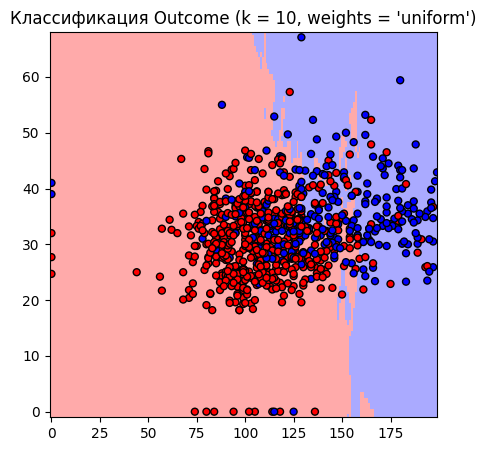

----------------------------------------------------------------------
Результаты классификации
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.75      0.85      0.80       123
           1       0.65      0.51      0.57        69

    accuracy                           0.72       192
   macro avg       0.70      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192

----------------------------------------------------------------------
Точность на тестовых данных = 72.39583333333334  %
----------------------------------------------------------------------


In [61]:
knn(10, X, y)

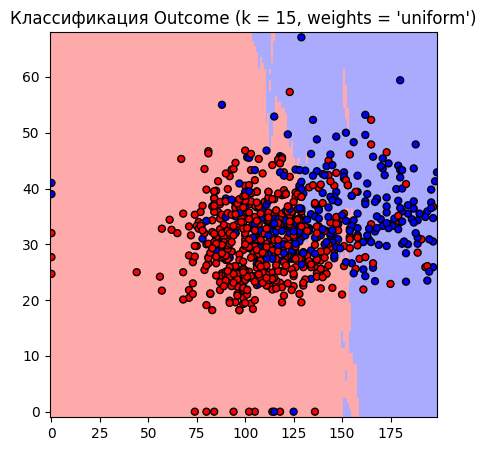

----------------------------------------------------------------------
Результаты классификации
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.77      0.80      0.78       123
           1       0.62      0.58      0.60        69

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192

----------------------------------------------------------------------
Точность на тестовых данных = 71.875  %
----------------------------------------------------------------------


In [62]:
knn(15, X, y)

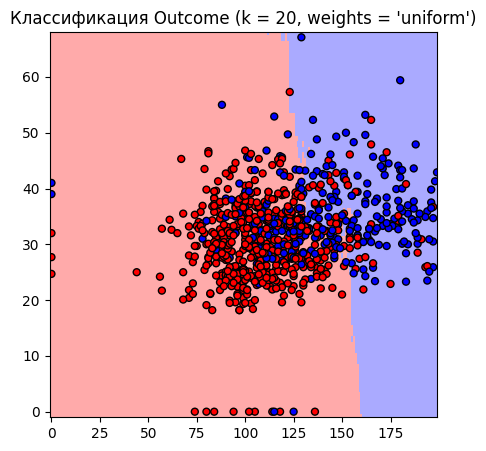

----------------------------------------------------------------------
Результаты классификации
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.75      0.82      0.79       123
           1       0.62      0.52      0.57        69

    accuracy                           0.71       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.71      0.71      0.71       192

----------------------------------------------------------------------
Точность на тестовых данных = 71.35416666666666  %
----------------------------------------------------------------------


In [63]:
knn(20, X, y)

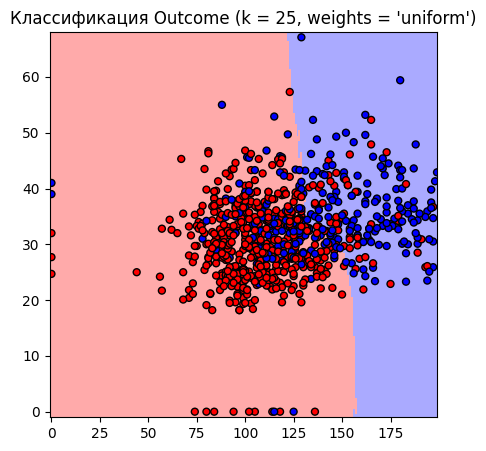

----------------------------------------------------------------------
Результаты классификации
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.77      0.83      0.80       123
           1       0.64      0.55      0.59        69

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.72       192

----------------------------------------------------------------------
Точность на тестовых данных = 72.91666666666666  %
----------------------------------------------------------------------


In [64]:
knn(25, X, y)

In [74]:
def linearRegression(df):
    # Определение признаков и целевой переменной
    X = df.drop(columns=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
    y = df['Insulin']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    # Обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train,y_train)
    # Тестируем модель на тестовых данных и оцениваем точность
    test_accuracy = model.score(X_test, y_test)
    print('Точность на тестовых данных =', test_accuracy*100)
    # Предсказываем по модели на тестовом множестве
    y_pred = model.predict(X_test)
    #print("Коэффициенты: \n", model.coef_)
    display(pd.DataFrame({'Коэффициенты': model.coef_[0]}, index = X_train.columns))
    print('Свободный член ', model.intercept_)
    print("Среднеквадратичная ошибка: %.2f" % mean_squared_error(y_test, y_pred))
    # чем ближе к 1, тем лучше предсказывает модель
    print("Коэффициент детерминации: %.2f" % r2_score(y_test, y_pred))

linearRegression(df)

Точность на тестовых данных = 23.559635152317927


,Коэффициенты
SkinThickness,3.107242
BMI,3.107242


Свободный член  5.491427254467126
Среднеквадратичная ошибка: 9630.23
Коэффициент детерминации: 0.24


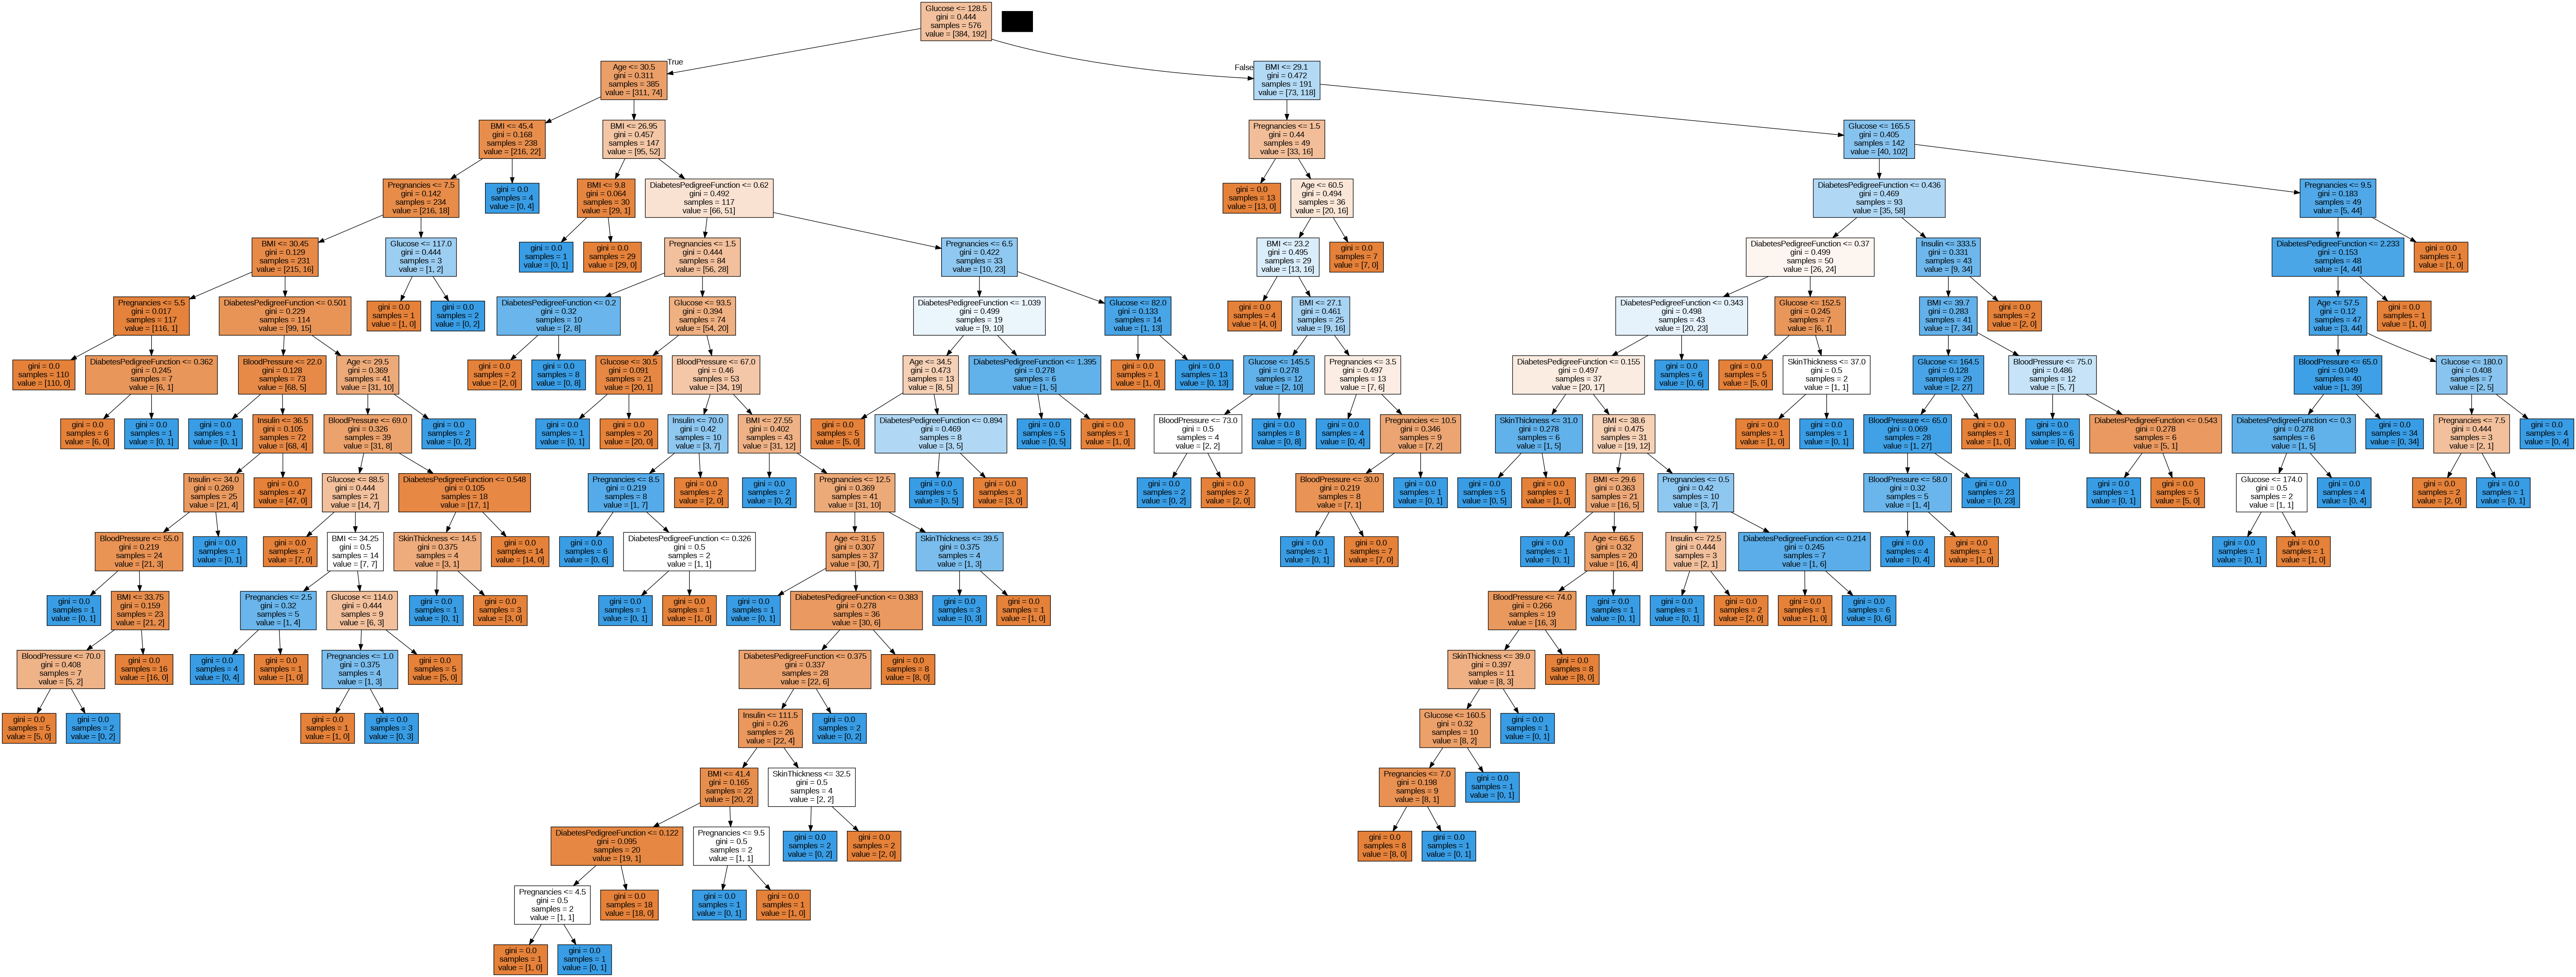

Точность на тестовых данных = 67.1875  %


In [75]:
# подготавливаем функцию для вывода
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    display(Image(graph.create_png()))

def decisionTree(df):
    # Определение признаков и целевой переменной
    X = df.drop(columns=['Outcome'])
    y = df['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=250)
    # Обучение модели KNeighborsClassifier
    model = DecisionTreeClassifier(criterion = 'gini')
    model.fit(X_train,y_train)
    tree_graph_to_png(model, feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
                  png_file_to_save='gini.png')
    # Тестируем модель на тестовых данных и оцениваем точность
    test_accuracy = model.score(X_test, y_test)
    print('Точность на тестовых данных =', test_accuracy*100, ' %')

decisionTree(df)